Una ecuación diferencial $\frac{dy}{dx}= f(x, y)$ es una fuente de información, y aunque no podamos obtener una solución análitica, podemos obtener una solución numéricamente; esto significa que la ED se utilizará como el principio básico de un algoritmo para aproximar a la solución desconocida. En esta sección vamos a comenzar por desarrollar el más sencillo de los métodos numéricos, un método que utiliza la idea de que se puede usar una recta tangente para aproximar los valores de una función en una pequeña vecindad del punto de tangencia. 

$\newcommand{\sen}{\,\hbox{sen}\,}$

## **Método de Euler**
Este método utiliza sucesivamente rectas tangentes para encontrar una solución aproximada.
Se usa la linealización de una solución incógnita $y(x)$ en $x=x_0$ \\

$$L(x)=y_0 + f(x_0,y_0)(x-x_0)$$

La gráfica de esta linealización es una recta tangente a la gráfica de $y=y(x)$ en el punto $(x_0,y_0)$

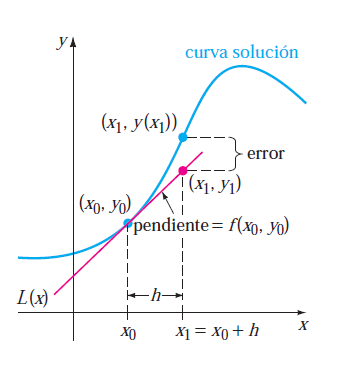

donde *h* es un incremento positivo como se muestra en la figura, entonces sustituyendo x por $x_1=x_0+h$, obtenemos

$$L(x_1)=y_0+f(x_0,y_0)(x_0+h-x_0)$$ \\
$$L(x_1)=y_0+hf(x_0,y_0)$$ \\
$$y_1=y_0+hf(x_1,y_1)$$



El punto $(x_1,y_1)$ en la recta es una aproximación del punto $(x_1,y(x_1))$ sobre la curva solución.\\
Por supuesto, la presición de la aporximación $L(x_1)\approx y(x_1)$ o $y_1=y(x_1)$ depende fuertemente del tamaño deml incremento *h*. 


El proceso anterior se repite usando la segunda "recta tangente" en $(x_1,y_1)$, por tanto, obtenemos una aproximación de $y_2\approx y(x_2)$ correspondiendo a dos pasos de longitud h a partir de $x_0$; es decir, $x_2=x_1+h=x_0+2h$



$$y(x_2)=y(x_0+2h)=y(x_1+h)$$

$$y_2=y_1+hf(x_1,y_1)$$

Continuando de esta manera, vemos que $y_1, y_2, y_3,....$, se pueden definir recursivamente mediante la fórmula general

$$\boxed{y_{n+1}=y_n+hf(x_n,y_n)}$$

donde $x_n=x_0+nh, \,\,\, n=0,1,2,...$

En otras palabras en cada punto $x_n$ la curva de la solución exacta es aproximada a la recta tangente en cada punto, con el valor de la pendiente determinada por la ecuación diferencial.

##Error de truncamiento local
El "*error local*" o "*error de truncación local*" mide a cada paso la cantidad por la cual la solución aproximada falla en satisfacer la ecuación diferencial en cada paso. Para deducir una fórmula para el error de truncamiento local del método de Euler, se usa la fórmula de Taylor con residuo.  

Si una función $y(x)$ tiene $k+1$ derivadas que son continnuas en un intervalo abierto que contiene  a "a" y a "x", entonces

$$y(x)=y(a)+y^{\prime}(a)\frac{x-a}{1!}+...+y^(k)(a)\frac{(x-a)^k}{k!}+y^{(k+1)}(c)\frac{(x-a)^{k+1}}{(k+1)!}$$
donde $c$ es algún punto entre $a \le c \le x$.

Con $k=1, a=x_n, x=x_{n+1}=x_n+h$, obtenemos

$$y(x_{n+1}) = y(x_n) + y^{\prime}(x_n)\frac{h}{1!} + y^{\prime\prime}(c)\frac{h^2}{2!}$$


$$y(x_{n+1})=y_n+hf(x_n,y_n)+y^{\prime\prime}(c)\frac{h^2}{2}$$

Esta fórmula corresponde al método de Euler sin tener en cuenta el último término. Por lo tanto, el error de truncamiento local en $y_{n+1}$ es

$$\boxed{y^{\prime\prime}(c)\frac{h^2}{2}}, \,\,\,\,\,\,\, x_n \le c \le x_{n+1}$$


por lo tanto este método es de primer orden $O(h)$.



#**Ejercicio 1: Movimiento de un proyectil**
Imagine un bateador que golpea una pelota de béisbol de modo que ésta sale del
bate con una rapidez de $v_0=50 m/s$ con un ángulo $\alpha = 53.1°$, en un
lugar donde $g=9.8 m/s^2$. a) Calcule la posición de la pelota✅.

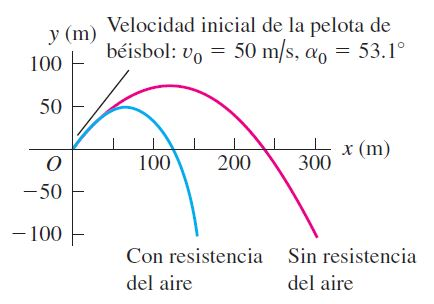

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
g = 9.80
angle = np.deg2rad(53.1) # 53.1*3.1416/180 n
speed = 50

vx0 = speed*np.cos(angle)
vy0 = speed*np.sin(angle)
t_total = (2*vy0)/g
R = (2 * vx0 * vy0)/g #alcance horizontal/n

h = 1 #tamaño del paso
t = np.arange(0, t_total+h, h)

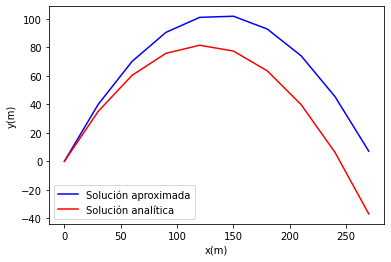

In [ ]:
x = np.zeros (len(t))
y = np.zeros (len(t))

#COndiciones iniciales
x[0] , y[0] = 0 , 0

#Implementamos Euler
for n in range(0, len(t)-1):
  x[n+1] = x[n] + h*speed*np.cos(angle)
  y[n+1] = y[n] + h*(vy0 - g*t[n])

#Solución analítica

x1 = vx0*t
y1 = vy0*t -(1/2)*g*t**2

aprox = plt.plot(x,y,'b-',label="Solución aproximada")
analitica = plt.plot(x1,y1,'r-',label="Solución analítica")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend(loc='best')




#**Método de Euler mejorado (Euler Predictor–Corrector)**

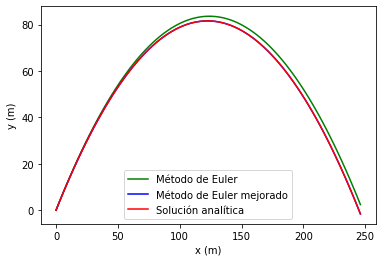

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.80
angle = np.deg2rad(53.1) # 53.1*3.1416/180 n
speed = 50

vx0 = speed*np.cos(angle)
vy0 = speed*np.sin(angle)
t_total = (2*vy0)/g
R = (2 * vx0 * vy0)/g #alcance horizontal/n

h = 0.1 #tamaño del paso
t = np.arange(0, t_total+h, h)

#Creación de vectores
x = np.zeros(len(t))
y = np.zeros(len(t))
vx = np.zeros(len(t))
vy = np.zeros(len(t))
r = np.zeros(len(t))
s = np.zeros(len(t))

#Condiciones iniciales
x[0], y[0] = 0 , 0
vy[0] = vy0
vx[0] = vx0 

#Prediciendo la próxima posición
for n in range(0, len(t)-1):
  x[n+1]=x[n] + h*vx0
  y[n+1]=y[n] + h*(vy0 - g*t[n])

  r[n+1]=r[n] + (h/2)*(vx0 + vx0) #Corrigiendo la nueva posición
  s[n+1]=s[n] + (h/2)*((vy0 - g*t[n]) + (vy0 - g*t[n+1]))

#solución exacta
x1 = vx0*t
y1 = vy0*t - (1/2)*g*t**2

yvsx = plt.plot(x, y,'g-',label="Método de Euler")
rvss = plt.plot(r, s,'b-',label="Método de Euler mejorado")
exacta = plt.plot(x1, y1,'r-',label="Solución analítica")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(loc='best')

plt.show()

#**Ejercicio 2: Movimeinto de un proyectil teniendo en cuenta la resistencia del aire**
La resistencia del aire tiene un efecto acumulativo considerable sobre el movimiento de un objeto que describe un movimiento parabólico.

Calcule la trayectoria de un motociclista que sale con un ángulo de 42.5° sobre la horizontal con una rapidez de 65 m/s. Las únicas fuerzas que actúan después del despegue son el peso y la resistencia aerodinámica. Las ecuaciones que describen el movimiento del motociclista son

$$\frac{d\vec{r}}{dt}=\vec{v}$$

$$\frac{d\vec{v}}{dt}=\vec{a}=\frac{\vec{F}}{m}$$

donde 
$$\vec{F}=-mg\hat{y} - m\kappa \vec{v}V$$
es la fuerza total en el sistema de masa total $m$.
 
Las constantes para este ejercicio son la aceleración de la gravedad, $g = 9.81\, m/s^2$, la densidad del aire $\rho = 1.2\, kg/m^3$, la masa combinada del motociclista y la moto $m = 250\, kg$, el coeficiente de arrastre, $c = 1$, el área de la sección transversal del conjunto, $A = 0.93 \,m^2$, y el ángulo de despegue, $\theta_0 = 42.5°$.

Utilice el método de Euler para calcular tres saltos diferentes, con diferentes valores de:    
a. Ángulo de despegue: 40°, 42.5° y 45°. 
b. Valores de la velocidad inicial y la densidad del aire. 

En cada caso, dibuje las trajectorias en una misma gráfica, resolviendo el sistema por medio del método de Euler mejorado✅

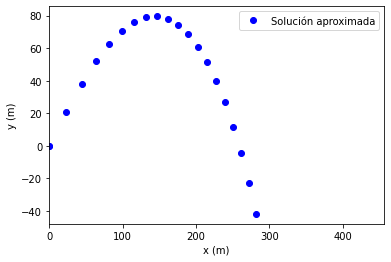

In [ ]:
n = 20
#Creación de vectores
x = np.zeros(n+1)
y = np.zeros(n+1)
vx = np.zeros(n+1)
vy = np.zeros(n+1)
ax = np.zeros(n+1)
ay = np.zeros(n+1)

angle = np.deg2rad(42.5) #42.5*3.1416/180
g = 9.80;
speed = 67
m = 250
A = 0.93
density = 1.2
k = A*density/(2*m)
vx0 = speed*np.cos(angle)
vy0 = speed*np.sin(angle)
T_total = 2*vy0/g
dt = 2*vy0/(g*n)

#Condiciones iniciales
x[0] = 0
y[0] = 0
vx[0] = vx0 
vy[0] = vy0
v = np.sqrt(vx[0]*vx[0] + vy[0]*vy[0]) #La rapidez inicial del proyectil (la magnitud de su velocidad en t=0)
ax[0] = -k*v*vx[0]
ay[0] = -g -k*v*vy[0]

#Calcular otras posiciones recursivamente
for i in range(0,n-1,1):
  x[i+1] = x[i] + dt*vx[i]
  y[i+1] = y[i] + dt*vy[i]
  vx[i+1] = vx[i] + dt*ax[i]
  vy[i+1] = vy[i] + dt*ay[i]
  v2 = np.sqrt(vx[i+1]*vx[i] + vy[i]*vy[i]) #La rapidez del proyectil (la magnitud de su velocidad) en cualquier instante
  ax[i+1] = -k*v2*vx[i]
  ay[i+1] = -g - k*v2*vy[i]

R = (2*vx0*vy0)/g
plt.xlim([0, R])
yvsx = plt.plot(x, y,'bo',label="Solución aproximada")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(loc='best')
plt.show()

##**Ejercicio 3: Péndulo simple**
Considere un péndulo formado por una masa $m$ y atado a una cuerda de longitud $L$, la cuerda forma un ángulo $\theta$ con la vertical, si se descompone la fuerza en las componentes radial y tangencial a la trayectoria y usamos la ecuaciones de Newton, se tiene que

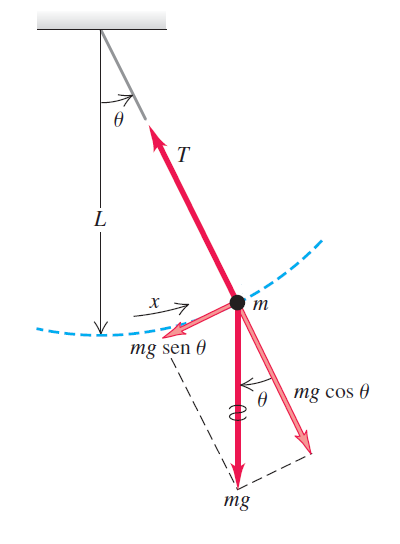

$$
\begin{align}
 \sum{F_y} = mg\cos\theta - T=&\,0\\
\sum{F_x} = -mg \sen\theta =& \,m\frac{d^2x}{dt^2} 
\end{align}
$$

donde $x=L\theta$, es la longitud de arco recorrido, si tenemos en cuenta que  tenemos una ecuación diferencial no lineal,

$$
 \frac{d^2\theta}{dt^2} + \omega_0^2\sen\theta = 0,
$$

donde $\omega_0 = \sqrt{\frac{g}{L}}$. Si consideramos $\theta$ pequeño ($\sen\theta\approx \theta$), esta ecuación tiene solución analítica, la cual da la ecuación de un oscilador armónico.

Como la ecuación es de segundo orden y el método de Euler es para ecuaciones de primer orden, re-escribimos la ecuación como dos ecuaciones lineales de primer orden acopladas,

$$
\begin{align}
 \frac{d\theta}{dt} =&\, \omega,\\
 \frac{d\omega}{dt} =&\, - \omega_0^2\sen\theta,
\end{align}
$$

por lo que implementando Euler en cada ecuación,

$$
\begin{align}
 \theta_{n+1} =&\,\theta_n + h\,\omega_n,\\
 \omega_{n+1} =&\,\omega_n - h\,\omega_0^2\sen\theta_n,
\end{align}
$$

para una mejor convergencia usaremos el nuevo $\theta_{n+1}$ en la segunda ecuación,  

$$\omega_{n+1} =\,\omega_n - h\,\omega_0^2\sen\theta_{n+1}.$$ 

✅ Encontrar la solución aproximada del péndulo simple usando el método de Euler mejorado.

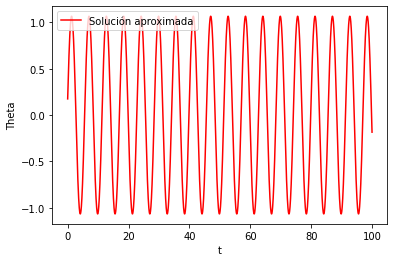

In [ ]:
from numpy import *
from matplotlib.pyplot import *

tmax = 100   # máximo tiempo de integración
L  = 7      # longitud cuerda
theta0 = np.deg2rad(10) # posición inicial
w0  = np.sqrt(9.8/L)     # velocidad angular inicial

h  = 0.01  # delta de tiempo en euler
t = np.arange(0, tmax+h, h)
#Vectores
theta = np.zeros(len(t))
theta[0] = theta0
w = np.zeros(len(t))
w[0]=w0

#----- Implementación del Método de euler:
for i in range(0,len(t)-1):
  theta[i+1] = theta[i] + h*w[i]
  w[i+1] = w[i] - h*w0**2*sin(theta[i+1])
  
y_theta = plt.plot(t, theta,'r-',label="Solución aproximada")
#y_w = plt.plot(t, w,'r-',label="Solución aproximada")
plt.xlabel("t")
plt.ylabel("Theta")
plt.legend(loc='upper left')
plt.show()      
 

#**Ejercicio 4: Oscilaciones amortiguadas**
Un objeto de 10.6 kg oscila en el extremo de un resorte vertical que tiene una constante de resorte de 2.05 $\times$ 10$^4$ N/m.
El efecto de la resistencia del aire se representa mediante el
coeficiente de amortiguamiento b = 3.00 N s/m. 
Grafique $x(t)$ en función del tiempo, resolviendo mediante el método de Euler mejorado.✅

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

k = 20500
b = 30
m = 10.6

h = 0.001
t = np.arange(0, 10+h, h)

#Condiciones iniciales
x0 = 1
v0 = 0.01

#Creación de vectores
v = np.zeros(len(t))
v[0] = v0
x = np.zeros(len(t))
x[0] = x0

#Método de Euler
for n in range(0, len(t)-1):
  x[n+1] = x[n] + h*v[n]
  v[n+1] = v[n] + h*(-(k/m)*x[n+1] - (b/m)*v[n])


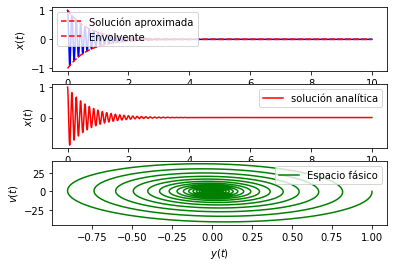

In [ ]:
#Solución análitica
w = np.sqrt((k/m) - (b/(2*m))**2)
exacta = x0*exp((-b/(2*m))*t)*cos(w*t)

envolvente = x0*exp((-b/(2*m))*t)

plt.subplot(3,1,1)
plt.plot(t, x,'b-')
plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.plot(t, envolvente,'r--',label="Solución aproximada")
plt.plot(t, -envolvente,'r--',label="Envolvente")
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(t, exacta,'r-',label="solución analítica")
plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(x, v,'g-',label="Espacio fásico")
plt.ylabel('$v(t)$')
plt.xlabel('$y(t)$')
plt.legend(loc='best')
plt.show()

Pang, T. (1999). An introduction to computational physics.

Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.

Sirca, S., & Horvat, M. (2012). Computational methods for physicists: compendium for students. Springer Science & Business Media.

Zill, D. G., Hernández, A. E. G., & López, E. F. (2002). Ecuaciones diferenciales con aplicaciones de modelado (No. 970-686-487-3.). México: Thomson Learning.


